<a href="https://colab.research.google.com/github/abol-hasan/Plantdisease_tensorflow_fastAPI_tfserving_Docker/blob/main/Potato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models
import pathlib

# Two functions:
1- plotting curves of accuracy and loss

2- plotting confusion matrix 

In [ ]:
def plot_loss_acc_curve(history):
  '''
  Arg: history comes from model.fit()
  '''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, acc, label='train_accuracy')
  plt.plot(epochs, val_acc, label= 'val_accuracy')
  plt.title('ACURRACY')
  plt.xlabel('EPOCHS')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, label ='train_loss')
  plt.plot(epochs, val_loss, label ='val_loss')
  plt.title('LOSS')
  plt.xlabel('EPOCHS')
  plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

#cm = confusion_matrix(True_label, predicted_classes)
def plot_conf_matrix(true_label, pred_label, nclass, figsize=(10,10), norm=False, savefig=False, textsize=10):
  '''
  plotting confusion_matrix with true labels and predicted labels.

  true_label: Array of truth labels (must be same shape as y_pred).
  pred_label: Array of predicted labels (must be same shape as y_true).
  nclass: Array of class labels (e.g. string form). If `None`, integer labels are used.
  norm: if it is true, it normalize the confusion matrix
  figsave: if it is true, it save the plot of confusion_matrix
  '''


  cm = confusion_matrix(true_label, pred_label)

  if norm:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
  else:
    print('without Normalization')
  print(cm)

  #plt.rcParams.update({'font.size': textsize})
  fig, ax = plt.subplots(figsize=figsize)
  tick=np.arange(len(nclass))
  plt.imshow(cm,cmap=plt.cm.Blues)
  plt.colorbar()
  plt.title('confusion_matrix')
  plt.xticks(tick, nclass, rotation=90)
  plt.yticks(tick, nclass)

  thresh = cm.max()/ 2.
  decim = '.2f' if norm else 'd'
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], decim),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
  plt.xlabel('predicted label')
  plt.ylabel('True_label')
  plt.show

  if savefig:
    fig.savefig("confusion_matrix.png")

# **Getting one with Data**

In [ ]:
filepath = '/content/drive/MyDrive/PlantVillage'

In [ ]:
trainpath = []
for roots, dir, files in os.walk(filepath):
  trainpath.append(roots)
trainpath[1:4]

['/content/drive/MyDrive/PlantVillage/Potato___healthy',
 '/content/drive/MyDrive/PlantVillage/Potato___Early_blight',
 '/content/drive/MyDrive/PlantVillage/Potato___Late_blight']

In [ ]:
rand_train_path = random.choice(trainpath[1:4])
rand_train_path

'/content/drive/MyDrive/PlantVillage/Potato___Early_blight'

In [ ]:
rand_foto = rand_train_path + '/' + random.choice(os.listdir(rand_train_path ))
rand_foto

'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/0a79700b-f834-41f5-ae51-6ceda6f67a48___RS_Early.B 8951.JPG'

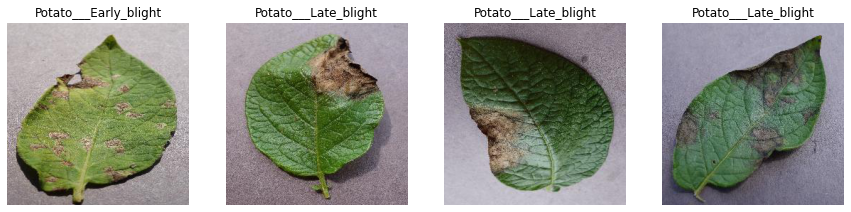

In [ ]:
plt.figure(figsize=(15,15))
for i in range(4): 
   ax = plt.subplot(1,4, i + 1)
   rand_train_path = random.choice(trainpath[1:4])
   rand_train_path_1 = str(rand_train_path).split('/')
   class_name = rand_train_path_1[5]
   rand_foto = rand_train_path + '/' + random.choice(os.listdir(rand_train_path ))
   img = plt.imread(rand_foto)
   plt.imshow(img)
   plt.title(class_name)
   plt.axis('off')


In [ ]:
import pathlib
import numpy as np
from pathlib import Path
data_dir = pathlib.Path('/content/drive/MyDrive/PlantVillage')
data_dir

PosixPath('/content/drive/MyDrive/PlantVillage')

In [ ]:
class_name = np.array(sorted([x.name for x in data_dir.glob('*')]))
print(class_name) 


['Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']


In [ ]:
def visualize_image(dir_name, one_class):
  '''
  Arg:
  dir_name: The path of the folder in which are the images
  one_class: The name of one class in dir_name
  '''

  goal_folder = dir_name + '/' + one_class + '/'
  rand_img = random.sample(os.listdir(goal_folder),1)
  image = plt.imread(goal_folder + rand_img[0]) 
  plt.imshow(image)
  plt.title(one_class)
  plt.axis('off')
  print(f'shape of image:{image.shape},\n type of image:{image.dtype}')
  return image


shape of image:(256, 256, 3),
 type of image:uint8


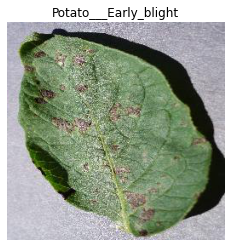

In [ ]:
image = visualize_image('/content/drive/MyDrive/PlantVillage','Potato___Early_blight')

# **Preprocess Data by using tf.keras.preprocessing.image_dataset_from_directory**

In [ ]:
Batch_size = 32
img_size = 224
traindata = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,validation_split=0.2,
                                                                batch_size=Batch_size, image_size=[img_size,img_size],
                                                                subset='training',seed=42)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.


In [ ]:
testdata = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,validation_split=0.2,
                                                                batch_size=Batch_size, image_size=[img_size,img_size],
                                                                subset='validation',seed=42)

Found 2152 files belonging to 3 classes.
Using 430 files for validation.


In [ ]:
class_nameNew = traindata.class_names
class_nameNew

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image, label in traindata:
  print(image.shape)
  print(image.dtype)
  print(label.shape)
  print(label)
  break

(32, 224, 224, 3)
<dtype: 'float32'>
(32,)
tf.Tensor([1 2 1 1 2 0 0 1 1 1 1 0 0 1 1 0 0 2 0 0 1 0 0 0 1 0 0 1 0 2 2 0], shape=(32,), dtype=int32)


# **getting data and preprocess by our own input pipeline using td.dataset**

In [ ]:
image_dataset = tf.data.Dataset.list_files('/content/drive/MyDrive/PlantVillage/*/*', shuffle=False)
print(f'len of image_dataset:{len(image_dataset)}')
for f in image_dataset.take(3):
  print(f.numpy())

len of image_dataset:2152
b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'
b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG'
b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG'


In [ ]:
image_dataset = image_dataset.shuffle(len(image_dataset))
for f in image_dataset.take(5):
  print(f.numpy())

b'/content/drive/MyDrive/PlantVillage/Potato___Late_blight/2565077d-44d3-4213-82c2-bf5ae9a64368___RS_LB 3295.JPG'
b'/content/drive/MyDrive/PlantVillage/Potato___Late_blight/e95f2954-1b68-490d-9684-90b3080676b1___RS_LB 3997.JPG'
b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/d825093a-2bd7-458d-a9a1-036db6c08dec___RS_Early.B 9018.JPG'
b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/0ed45bc2-c8cc-4d65-8f53-bdc10d78a7dc___RS_Early.B 8504.JPG'
b'/content/drive/MyDrive/PlantVillage/Potato___Late_blight/53b09253-988e-4a22-966c-b5a03ed6bc44___RS_LB 2924.JPG'


In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/PlantVillage')
class_name = np.array(sorted([x.name for x in data_dir.glob('*')]))
print(class_name) 

['Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']


In [ ]:
image_num = int(len(image_dataset) * 0.8)
train_set = image_dataset.take(image_num)
test_set = image_dataset.skip(image_num)
print(f'len of train_set:{len(train_set)} \n len of test_set:{len(test_set)}')

len of train_set:1721 
 len of test_set:431


In [ ]:
for i in train_set.take(3):
  print(i)
  print()
  label_ = tf.strings.split(i,os.path.sep)[-2]
  print(label_)
  a = label_ == class_name
  print()
  print(a)
  print(tf.argmax(a))


tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Late_blight/d99f0d05-6ee3-440c-9dc6-48f7ba2bfc24___RS_LB 2654.JPG', shape=(), dtype=string)

tf.Tensor(b'Potato___Late_blight', shape=(), dtype=string)

tf.Tensor([False  True False], shape=(3,), dtype=bool)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/0bbb8bce-2020-416b-8bd6-c160c2db9921___RS_Early.B 8386.JPG', shape=(), dtype=string)

tf.Tensor(b'Potato___Early_blight', shape=(), dtype=string)

tf.Tensor([ True False False], shape=(3,), dtype=bool)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/6a90d533-28ad-4e1b-935b-8d2dfa804c87___RS_Early.B 8213.JPG', shape=(), dtype=string)

tf.Tensor(b'Potato___Early_blight', shape=(), dtype=string)

tf.Tensor([ True False False], shape=(3,), dtype=bool)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
tf.strings.split('/content/drive/MyDrive/PlantVillage/Potato___Late_blight/e6d7f5aa-d176-4e43-9e0c-afc2901442f6___RS_LB 3066.JPG','/')

<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'', b'content', b'drive', b'MyDrive', b'PlantVillage',
       b'Potato___Late_blight',
       b'e6d7f5aa-d176-4e43-9e0c-afc2901442f6___RS_LB 3066.JPG'],
      dtype=object)>

In [ ]:
def get_label(data):
  label_ = tf.strings.split(data,os.path.sep)[-2]
  return tf.argmax(label_ == class_name)

In [ ]:
for l in train_set.map(get_label).take(3):
  print(l)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
im_size = 224
def image_preprocess(filepath):
  label = get_label(filepath)
  img = tf.io.read_file(filepath)
  img = tf.io.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [im_size, im_size])
  img = img/255.
  return img, label

In [ ]:
train_set = train_set.map(image_preprocess)
test_set = test_set.map(image_preprocess)

In [ ]:
for image, label in train_set.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  1


In [ ]:
train_set = train_set.cache().shuffle(1000).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Building the Model
Data_aug = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)],)


In [ ]:
cnn = models.Sequential([
  Data_aug,                       
  layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),                       
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(3, activation='softmax')                       
])


In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = cnn.fit(train_set, epochs =50, verbose=1, validation_data=test_set, steps_per_epoch=len(train_set))

# **Building model with API functional**

In [ ]:
#Number of classes
k = len(class_name)

In [ ]:
# Building Model
input_image = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")(input_image)
x = layers.experimental.preprocessing.RandomRotation(0.2)(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)                         
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = layers.Dense(k, activation='softmax')(x)
model_0 = tf.keras.Model(input_image, output)

In [ ]:
model_0.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model_0.fit(train_set, epochs=50, verbose=1, validation_data=test_set)

Epoch 1/50
54/54 [==============================] - 280s 2s/step - loss: 0.9068 - accuracy: 0.4939 - val_loss: 0.8066 - val_accuracy: 0.6729
Epoch 2/50
54/54 [==============================] - 3s 50ms/step - loss: 0.7037 - accuracy: 0.7164 - val_loss: 0.5498 - val_accuracy: 0.7912
Epoch 3/50
54/54 [==============================] - 3s 50ms/step - loss: 0.4478 - accuracy: 0.8327 - val_loss: 0.6097 - val_accuracy: 0.7842
Epoch 4/50
54/54 [==============================] - 3s 50ms/step - loss: 0.3723 - accuracy: 0.8582 - val_loss: 0.3432 - val_accuracy: 0.8631
Epoch 5/50
54/54 [==============================] - 3s 51ms/step - loss: 0.2859 - accuracy: 0.8879 - val_loss: 0.3474 - val_accuracy: 0.8585
Epoch 6/50
54/54 [==============================] - 3s 49ms/step - loss: 0.2812 - accuracy: 0.8873 - val_loss: 0.2685 - val_accuracy: 0.9072
Epoch 7/50
54/54 [==============================] - 3s 50ms/step - loss: 0.2583 - accuracy: 0.9024 - val_loss: 0.1971 - val_accuracy: 0.9234
Epoch 8/50
54

In [ ]:
plot_loss_acc_curve(hist)

In [ ]:
# Evaluate the model
eval =model_0.evaluate(test_set)

14/14 [==============================] - 0s 20ms/step - loss: 0.0183 - accuracy: 0.9954


In [ ]:
#Saving different model
version_of_model = max([int(i) for i in os.listdir('drive/MyDrive/model_potato_save') + [0]]) + 1
model_0.save(f'drive/MyDrive/model_potato_save/{version_of_model}')

INFO:tensorflow:Assets written to: drive/MyDrive/model_potato_save/1/assets


In [ ]:
# prediction by model
pred = model_0.predict(test_set)


In [ ]:
pred_label =pred.argmax(axis=1)

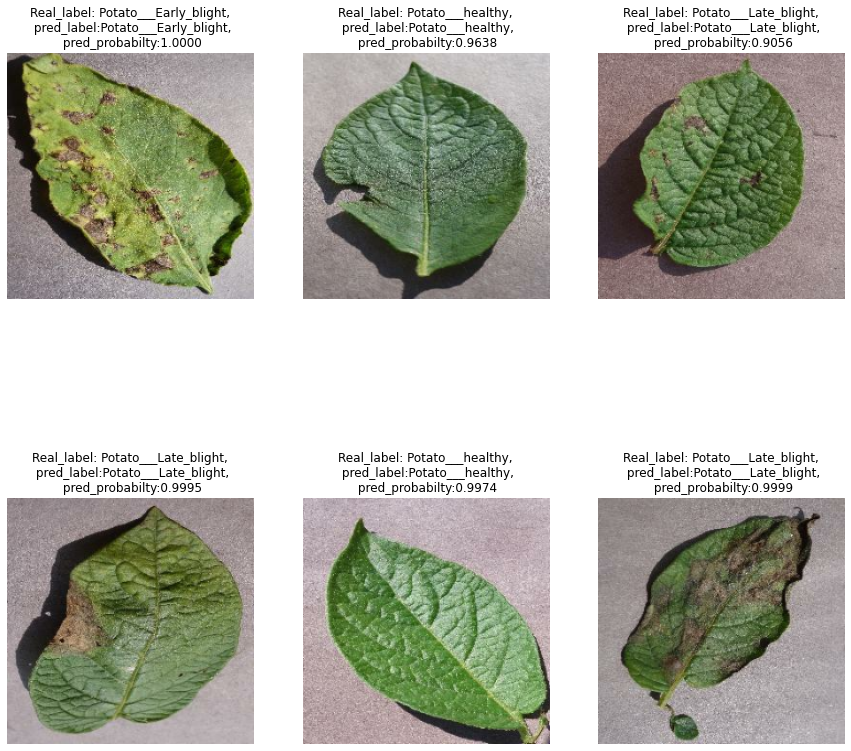

In [ ]:
# Visualize the predicted images
for img, label in test_set.take(1):
  plt.figure(figsize=(15,15))
  for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(img[i])
    plt.title(f'Real_label: {class_name[label[i]]},\n pred_label:{class_name[pred_label[i]]},\n pred_probabilty:{pred[i].max():.4f}')
    plt.axis('off')

In [ ]:
True_label = [label.numpy() for image, label in test_set.unbatch()]

without Normalization
[[200   1   0]
 [  0 190   2]
 [  0   1  37]]


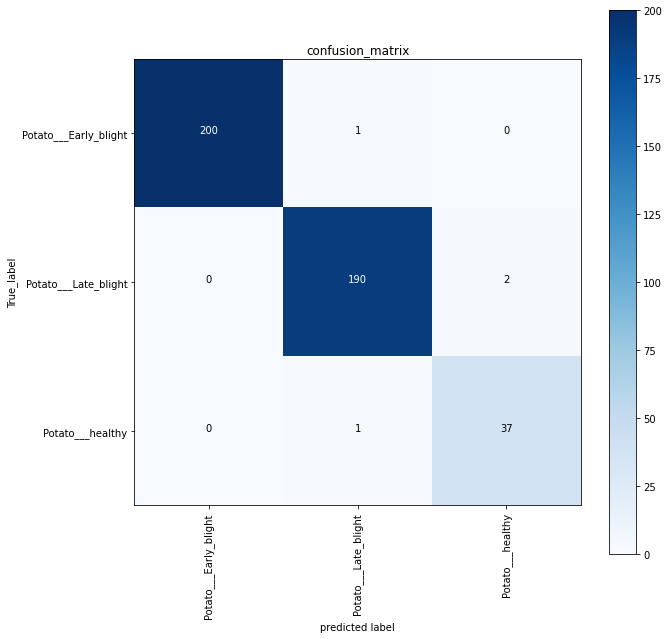

In [ ]:
plot_conf_matrix(True_label, pred_label, class_name)

# Getting data  and augmenting them by using **ImageDataGenerator**









In [ ]:
train_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255., rotation_range=0.2,
                                                                 shear_range=0.2,
                                                                 horizontal_flip=True,
                                                                 width_shift_range=0.3,
                                                                 height_shift_range=0.3,
                                                                 zoom_range=0.2, validation_split=0.2)

In [ ]:
dataGen_without_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,validation_split=0.2)


In [ ]:
# getting data from training directory anf augment it
print('training data which are augmented')
train_data_aug = train_data_aug.flow_from_directory(directory='/content/drive/MyDrive/PlantVillage',
                                                    target_size=(224,224) ,batch_size=32, class_mode='sparse',
                                                    subset='training', shuffle =False)

print('training data which are NOT augmented, only rescale them')
train_data = dataGen_without_aug.flow_from_directory(directory='/content/drive/MyDrive/PlantVillage',
                                                    target_size=(224,224) ,batch_size=32, class_mode='sparse',
                                                     subset='training',shuffle =False)

test_data = dataGen_without_aug.flow_from_directory(directory='/content/drive/MyDrive/PlantVillage',
                                                    target_size=(224,224) ,batch_size=32, class_mode='sparse',
                                                     subset='validation',shuffle =False) 

training data which are augmented
Found 1722 images belonging to 3 classes.
training data which are NOT augmented, only rescale them
Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [ ]:
img_aug, label_aug = train_data_aug.next()
org_img, org_label = train_data.next()

In [ ]:
print(label_aug.astype(int)[0])

0


Random_number:11


(-0.5, 223.5, 223.5, -0.5)

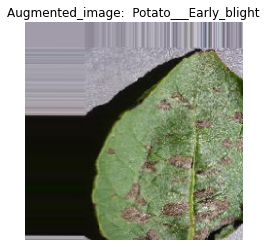

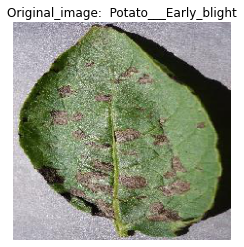

In [ ]:
# Visualizing Augmented image and Non_augmented_image
import random
rand_num = random.randint(0,31)
print(f'Random_number:{rand_num}')
plt.imshow(img_aug[rand_num])
plt.title(f'Augmented_image:  {class_name[label_aug.astype(int)[rand_num]]}')
plt.axis('off')
plt.figure()
plt.imshow(org_img[rand_num])
plt.title(f'Original_image:  {class_name[org_label.astype(int)[rand_num]]}')
plt.axis('off')

In [ ]:
train_data_aug_shuffle = train_data_aug.flow_from_directory(directory='/content/drive/MyDrive/PlantVillage',
                                                    target_size=(224,224) ,batch_size=32, class_mode='sparse',
                                                    subset='training', shuffle =True)
test_data_shuffle = dataGen_without_aug.flow_from_directory(directory='/content/drive/MyDrive/PlantVillage',
                                                    target_size=(224,224) ,batch_size=32, class_mode='sparse',
                                                     subset='validation',shuffle =True) 

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [ ]:
# Train model with augmented image and functional API
input_image = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_image)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)                         
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)
model_aug_data_gen = tf.keras.Model(input_image, output)

In [ ]:
model_aug_data_gen.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_aug_data_gen = model_aug_data_gen.fit(train_data_aug_shuffle, epochs=50, verbose=1, validation_data=test_data_shuffle)

Epoch 1/50
54/54 [==============================] - 48s 852ms/step - loss: 0.9064 - accuracy: 0.4623 - val_loss: 0.8355 - val_accuracy: 0.4907
Epoch 2/50
54/54 [==============================] - 27s 503ms/step - loss: 0.7387 - accuracy: 0.6336 - val_loss: 0.6383 - val_accuracy: 0.7023
Epoch 3/50
54/54 [==============================] - 28s 510ms/step - loss: 0.5388 - accuracy: 0.7631 - val_loss: 0.5400 - val_accuracy: 0.7628
Epoch 4/50
54/54 [==============================] - 27s 500ms/step - loss: 0.3962 - accuracy: 0.8415 - val_loss: 0.4388 - val_accuracy: 0.8140
Epoch 5/50
54/54 [==============================] - 27s 499ms/step - loss: 0.3934 - accuracy: 0.8496 - val_loss: 0.7357 - val_accuracy: 0.6558
Epoch 6/50
54/54 [==============================] - 27s 502ms/step - loss: 0.3720 - accuracy: 0.8484 - val_loss: 0.4644 - val_accuracy: 0.8953
Epoch 7/50
54/54 [==============================] - 27s 504ms/step - loss: 0.3275 - accuracy: 0.8815 - val_loss: 0.4079 - val_accuracy: 0.8209

# Preprocess Data by using tf.keras.preprocessing.image_dataset_from_directory:
**for complete Dataset (pepper, tomato, potato)**

In [ ]:
data_dir_complete = '/content/drive/MyDrive/PlantVillage_complete'
Batch_size = 32
img_size = 224
traindataset = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_complete,validation_split=0.2,
                                                                batch_size=Batch_size, image_size=[img_size,img_size],
                                                                subset='training',seed=42)

Found 20638 files belonging to 15 classes.
Using 16511 files for training.


In [ ]:
testdataset = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_complete,validation_split=0.2,
                                                                batch_size=Batch_size, image_size=[img_size,img_size],
                                                                subset='validation',seed=42, shuffle=False)

Found 20638 files belonging to 15 classes.
Using 4127 files for validation.


In [ ]:
class_name_complete = traindataset.class_names
class_name_complete

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
for image, label in traindataset.take(1):
  print(image.shape)
  print(image.dtype)
  print(label.shape)
  print(label)
  break

(32, 224, 224, 3)
<dtype: 'float32'>
(32,)
tf.Tensor(
[ 1 10 11 14  6  3 12  8 12 12  7 14 13  0  9 11  9  0 10  5  2 12 10  7
 12  5 14 11  7  5  8 12], shape=(32,), dtype=int32)


In [ ]:
traindataset = traindataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testdataset = testdataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#Number of classes
k = len(class_name_complete)

In [ ]:
# Building Model
input_image = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input_image)
x = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")(x)
x = layers.experimental.preprocessing.RandomRotation(0.2)(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3) , activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)                         
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = layers.Dense(k, activation='softmax')(x)
model_complete = tf.keras.Model(input_image, output)

In [ ]:
model_complete.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model_complete.fit(traindataset, epochs=50, verbose=1, validation_data=testdataset)

Epoch 1/50
516/516 [==============================] - 1887s 369ms/step - loss: 1.7843 - accuracy: 0.4129 - val_loss: 0.6429 - val_accuracy: 0.8122
Epoch 2/50
516/516 [==============================] - 101s 113ms/step - loss: 0.9325 - accuracy: 0.6881 - val_loss: 0.2521 - val_accuracy: 0.9198
Epoch 3/50
516/516 [==============================] - 96s 111ms/step - loss: 0.6507 - accuracy: 0.7798 - val_loss: 0.2839 - val_accuracy: 0.9116
Epoch 4/50
516/516 [==============================] - 95s 111ms/step - loss: 0.5239 - accuracy: 0.8174 - val_loss: 0.1719 - val_accuracy: 0.9511
Epoch 5/50
516/516 [==============================] - 93s 110ms/step - loss: 0.4384 - accuracy: 0.8481 - val_loss: 0.2159 - val_accuracy: 0.9370
Epoch 6/50
516/516 [==============================] - 93s 110ms/step - loss: 0.4000 - accuracy: 0.8602 - val_loss: 0.0902 - val_accuracy: 0.9733
Epoch 7/50
516/516 [==============================] - 94s 111ms/step - loss: 0.3671 - accuracy: 0.8757 - val_loss: 0.1384 - val

In [ ]:
# Save model
save_dir_complete = 'drive/MyDrive/model_complete_save'
#os.mkdir(save_dir_complete)
model_complete.save(save_dir_complete)

INFO:tensorflow:Assets written to: drive/MyDrive/model_complete_save/assets


In [ ]:
#Different Version of Model
import os
model_version = max([int(i) for i in os.listdir('drive/MyDrive/model_complete_save_V') + [0]]) + 1

In [ ]:
model_complete.save(f'drive/MyDrive/model_complete_save_V/{model_version}')

INFO:tensorflow:Assets written to: drive/MyDrive/model_complete_save_V/3/assets


In [ ]:
# load model
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/model_complete_save')

In [ ]:
# evaluate model
model_eval = model_loaded.evaluate(testdataset)

129/129 [==============================] - 40s 88ms/step - loss: 0.1037 - accuracy: 0.9678


In [ ]:
real_labels = [label.numpy() for image, label in testdataset.unbatch()]

In [ ]:
img = np.array([image for image, label in testdataset.unbatch()])


In [ ]:
# make prediction
pred = model_loaded.predict(testdataset)

In [ ]:
predicted_label = pred.argmax(axis=1)

In [ ]:
# function for showing the misclassified images 
def show_misclassified_image(true_label, prediction_label, image):
   '''
   function for showing the misclassified images 
   '''
   miscalssified = np.where(true_label != prediction_label)[0]
   sample = random.choice(miscalssified)
   image = image/255.
   plt.figure(figsize=(7,7))
   plt.imshow(img[sample])
   plt.title(f'True_label: {class_name_complete[real_labels[sample]]} \n prediction_label: {class_name_complete[predicted_label[sample]]}')
   plt.axis('off')

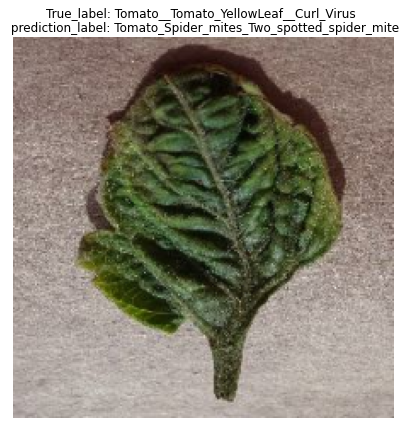

In [ ]:
show_misclassified_image(real_labels, predicted_label,img)